In [43]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import scipy.stats as stats

###Problem 1: 
- Create a points in $\mathbb{R}^n$ where $n$ is the dimension of "mins". 
- Calculate the Volume of $\Omega$
- TODO: Check on what the lab standards are on docstrings

In [2]:
def mc_int(f, mins, maxs, numPoints=500, numIters=100):
    """Use Monte-Carlo integration to approximate the integral of f
    on the box defined by mins and maxs.
    
    Inputs:
        f (function) - The function to integrate. This function should 
            accept a 1-D NumPy array as input.
        mins (1-D np.ndarray) - Minimum bounds on integration.
        maxs (1-D np.ndarray) - Maximum bounds on integration.
        numPoints (int, optional) - The number of points to sample in 
            the Monte-Carlo method. Defaults to 500.
        numIters (int, optional) - An integer specifying the number of 
            times to run the Monte Carlo algorithm. Defaults to 100.
        
    Returns:
        estimate (int) - The average of 'numIters' runs of the 
            Monte-Carlo algorithm.
                
    Example:
        >>> f = lambda x: np.hypot(x[0], x[1]) <= 1
        >>> # Integral over the square [-1,1] x [-1,1]. Should be pi.
        >>> mc_int(f, np.array([-1,-1]), np.array([1,1]))
        3.1290400000000007
    """
    if len(mins) != len(maxs):
        raise ValueError("Dimension of mins and maxs must be the same")
    
    results = []
    for i in xrange(numIters):
        # create points
        dim = len(mins)
        side_lengths = maxs-mins
        points = np.random.rand(numPoints,dim)
        points = side_lengths*points + mins

        # calculate Volume
        V = 1
        for i in xrange(dim):
            V *= maxs[i] - mins[i]

        # apply the function f along axis=1 and sum all the results
        total = np.sum(np.apply_along_axis(f,1,points))
        results.append((V/float(numPoints))*total)
    estimate = np.average(results)
    return estimate

In [57]:
f = lambda x: la.norm([x[0],x[1],x[2]]) <= 1

In [58]:
mc_int(f,np.array([-1,-1,-1]),np.array([1,1,1]))

4.1812800000000001

###Problem 2.1:
- Compute the integral of the the join normal distribution using SciPy. 
+ Use covs = np.eye(4))

### Problem 2.2:
Compute the integral using my mc_int() function from before. 

Do this for values on $\Omega$ with values of numPoints = $\{10,100,1000,10000\}$

In [54]:
def joint_normal(mins, maxs):
    """Caluclate the integral of the joint normal distribution using SciPy and 
    Monte Carlo integration.
    
    Inputs:
        mins (1-D np.ndarray) - Minimum bounds of integration.
        maxs (1-D np.ndarray) - Maximum bounds of integration.
    
    Returns:
        value (int) - result from intregration using SciPy
        estimate (1-D np.ndarray) - result of Monte Carlo integration
            using 'numPoints' = {10,100,1000,10000}
    """
    # define means and covs
    means = np.zeros(4)
    covs = np.eye(4)

    #calculate integral using SciPy
    value, inform = stats.mvn.mvnun(mins, maxs, means, covs)

    f = lambda x: (1./np.sqrt((2*np.pi)**(len(x))))*np.exp(-x.dot(x)/2)
    estimates = []
    for n in xrange(1,5):
        estimates.append(mc_int(f,mins,maxs,numPoints=10**n))
    estimates = np.array(estimates)
    
    return value, estimates
    

In [55]:
joint_normal()

[  1.53092420e-05   9.77918000e-06   8.88473876e-06   5.58507928e-07]


[ -1.02388262e-05  -4.83478289e-05  -5.78671235e-06   1.69930094e-06]


<IPython.core.display.Javascript object>


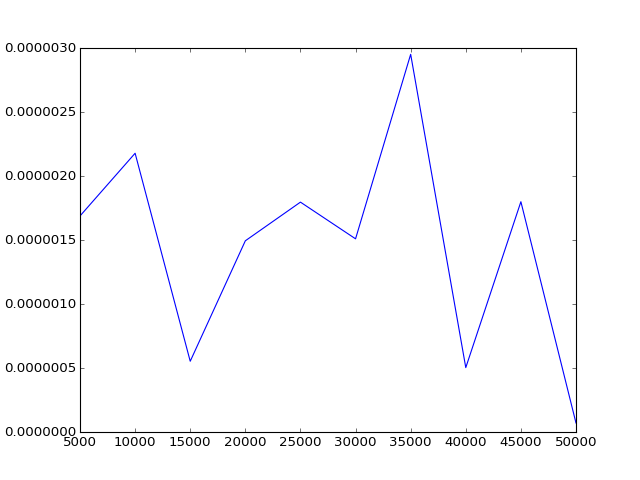

In [52]:
%matplotlib notebook
plt.plot(x,np.abs(value - estimates))

In [8]:
# to evaluate the function f using the rows of vecs as input
f = lambda x: la.norm(x)
vecs = np.array([[1,1,1],[0,2,1],[0.5,0.5,0.5],[1,0,1]])
np.apply_along_axis(f,1,vecs)

array([ 1.73205081,  2.23606798,  0.8660254 ,  1.41421356])